# Ashwin R

## 19343 - CSE D

### Data Loading

In [2]:
!git clone https://github.com/ashwinkey04/ml-project
!mv ml-project/cs-training.csv cs-training.csv
!mv ml-project/Data\ Dictionary.csv Data\ Dictionary.csv
!rm -rf ml-project

Cloning into 'ml-project'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (11/11), 4.38 MiB | 1.58 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("cs-training.csv").drop('Unnamed: 0', axis = 1)

print('First 5 entries')
df.head(5)
# Reading the data

First 5 entries


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Check the data

In [5]:
df.dtypes
# checking the datatypes of columns

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [6]:
df.isnull().any()
#Checking if any col has null

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [7]:
df.isna().sum()
#Total number of null values in each col

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df = df.fillna(df.mean()) #filling null values with the corresponding mean

In [9]:
df.isna().sum() #Verifying if null values are filled

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [10]:
df.duplicated().sum()
#Checking number of duplicate rows

609

In [11]:
df = df.drop_duplicates() #Removing duplicates

In [12]:
df.duplicated().sum() #Verifying duplicates removal

0

In [13]:
df.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,6.193026,52.762889,0.258096,358.660353,6736.657035,8.522923,0.112525,1.024702,0.104002,0.746401
1,4.373001,45.947048,2.284844,295.620123,5803.613041,7.895594,1.987112,0.990209,1.723449,0.946327


In [14]:
df.count()

SeriousDlqin2yrs                        149391
RevolvingUtilizationOfUnsecuredLines    149391
age                                     149391
NumberOfTime30-59DaysPastDueNotWorse    149391
DebtRatio                               149391
MonthlyIncome                           149391
NumberOfOpenCreditLinesAndLoans         149391
NumberOfTimes90DaysLate                 149391
NumberRealEstateLoansOrLines            149391
NumberOfTime60-89DaysPastDueNotWorse    149391
NumberOfDependents                      149391
dtype: int64

### Data Summarization


In [15]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
print("Customer credit data -  rows:",df.shape[0]," columns:", df.shape[1])

Customer credit data -  rows: 149391  columns: 11


In [17]:
df.describe(include='all').T
#Printing a statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.030132,0.154235,0.556494,50708.0
age,149391.0,52.306237,14.725962,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.177441,0.368234,0.875279,329664.0
MonthlyIncome,149391.0,6674.144318,12905.761964,0.0,3900.000000,6576.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.000000,0.000000,0.000000,98.0


In [18]:
df['DebtRatio'].value_counts().shape

(114194,)

In [19]:
df['RevolvingUtilizationOfUnsecuredLines'].value_counts().head(5)

0.000000    10569
1.000000     9956
1.000000       17
0.950100        8
0.007984        6
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [20]:
# Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Multicollinearity is a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.
# Variance inflation factors (VIF) measure how much the variance of the estimated regression 
# coefficients are inflated as compared to when the predictor variables are not linearly related.

from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines'],1)
factor = pd.DataFrame()
factor['SeriousDlqin2yrs']= data.columns
factor['DebtRatio']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
factor

,SeriousDlqin2yrs,DebtRatio
0,SeriousDlqin2yrs,1.100449
1,RevolvingUtilizationOfUnsecuredLines,1.000649
2,age,3.690867
3,NumberOfTime30-59DaysPastDueNotWorse,34.064850
4,DebtRatio,1.034080
5,MonthlyIncome,1.277274
6,NumberOfOpenCreditLinesAndLoans,3.707069
7,NumberOfTime60-89DaysPastDueNotWorse,33.693727
8,NumberOfDependents,1.407823


### <font color=green>Data Visualization</font>

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   

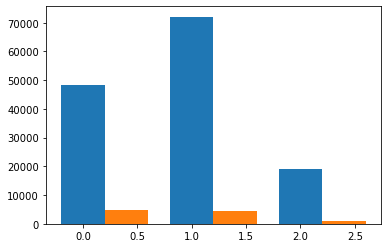

In [21]:
# monthlyIncome and bad ratio correlation
print (df.head())
grouped = df['MonthlyIncome'].groupby(df['MonthlyIncome']).count()

# plt.plot(grouped.index, grouped.values,"-", color = "r")
# plt.show()
print (grouped.index.tolist()[1:100])
incomes = grouped.index.tolist()
bad_users = []
good_users = []
bad_users_5k = 0
good_users_5k = 0 
bad_users_10k = 0
good_users_10k = 0 
bad_users_other = 0
good_users_other = 0 
for income in incomes:
    if income < 5000:
        bad_user_cnt = len(df[(df['MonthlyIncome'] == income) & (df['SeriousDlqin2yrs'] == 1)])
        bad_users_5k += bad_user_cnt
        good_users_5k += (grouped[income] - bad_user_cnt)
    elif income < 10000:
        bad_user_cnt = len(df[(df['MonthlyIncome'] == income) & (df['SeriousDlqin2yrs'] == 1)])
        bad_users_10k += bad_user_cnt
        good_users_10k += (grouped[income] - bad_user_cnt)
    else:
        bad_user_cnt = len(df[(df['MonthlyIncome'] == income) & (df['SeriousDlqin2yrs'] == 1)])
        bad_users_other += bad_user_cnt
        good_users_other += (grouped[income] - bad_user_cnt)

good_num_list = [good_users_5k,good_users_10k,good_users_other]
bad_num_list = [bad_users_5k,bad_users_10k,bad_users_other]

x = list(range(len(bad_num_list)))
plt.bar(x,good_num_list,width=0.4)
for i in range(len(x)):
    x[i] = x[i] + 0.4
plt.bar(x,bad_num_list,width=0.4)
plt.show()



                                      SeriousDlqin2yrs  \
SeriousDlqin2yrs                              1.000000   
RevolvingUtilizationOfUnsecuredLines         -0.001818   
age                                          -0.115721   
NumberOfTime30-59DaysPastDueNotWorse          0.131517   
DebtRatio                                    -0.007719   
MonthlyIncome                                -0.018076   
NumberOfOpenCreditLinesAndLoans              -0.030535   
NumberOfTimes90DaysLate                       0.122495   
NumberRealEstateLoansOrLines                 -0.007631   
NumberOfTime60-89DaysPastDueNotWorse          0.106257   
NumberOfDependents                            0.045369   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                 -0.001818   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                                              -0.0

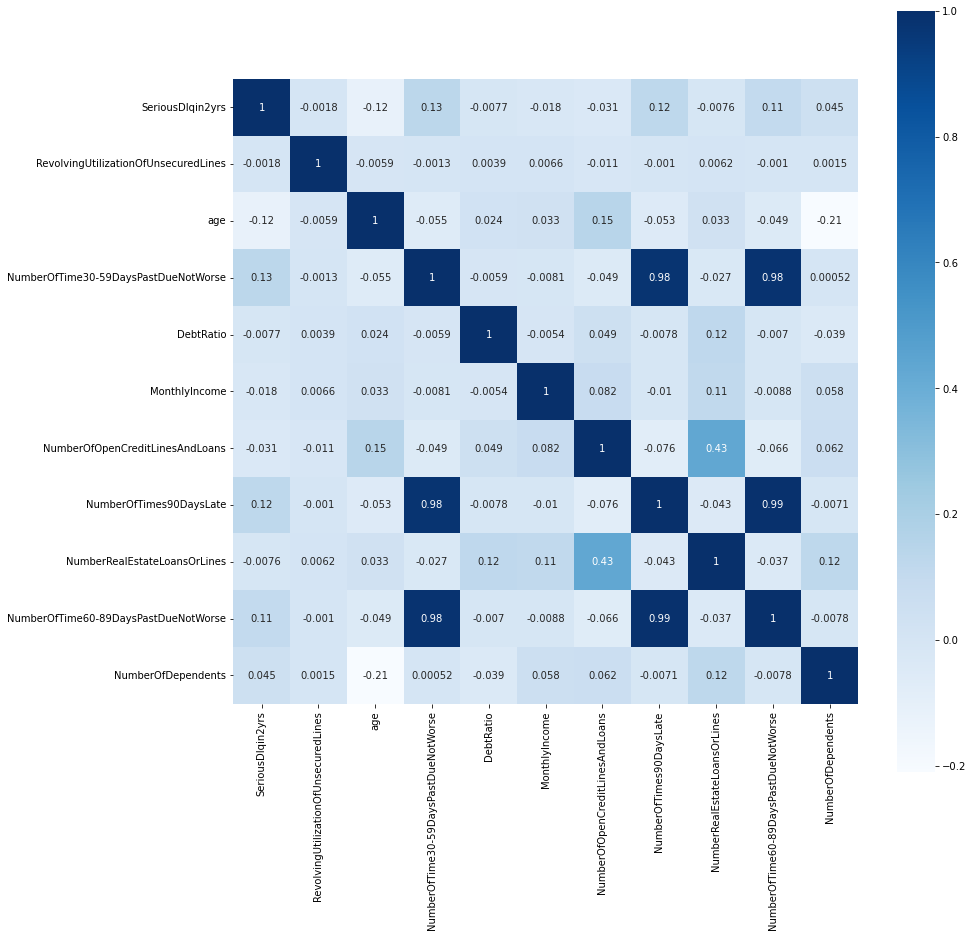

In [22]:
print (df.corr())

dfData = df.corr()
plt.subplots(figsize=(14, 14)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('./BluesStateRelation.png')
plt.show()

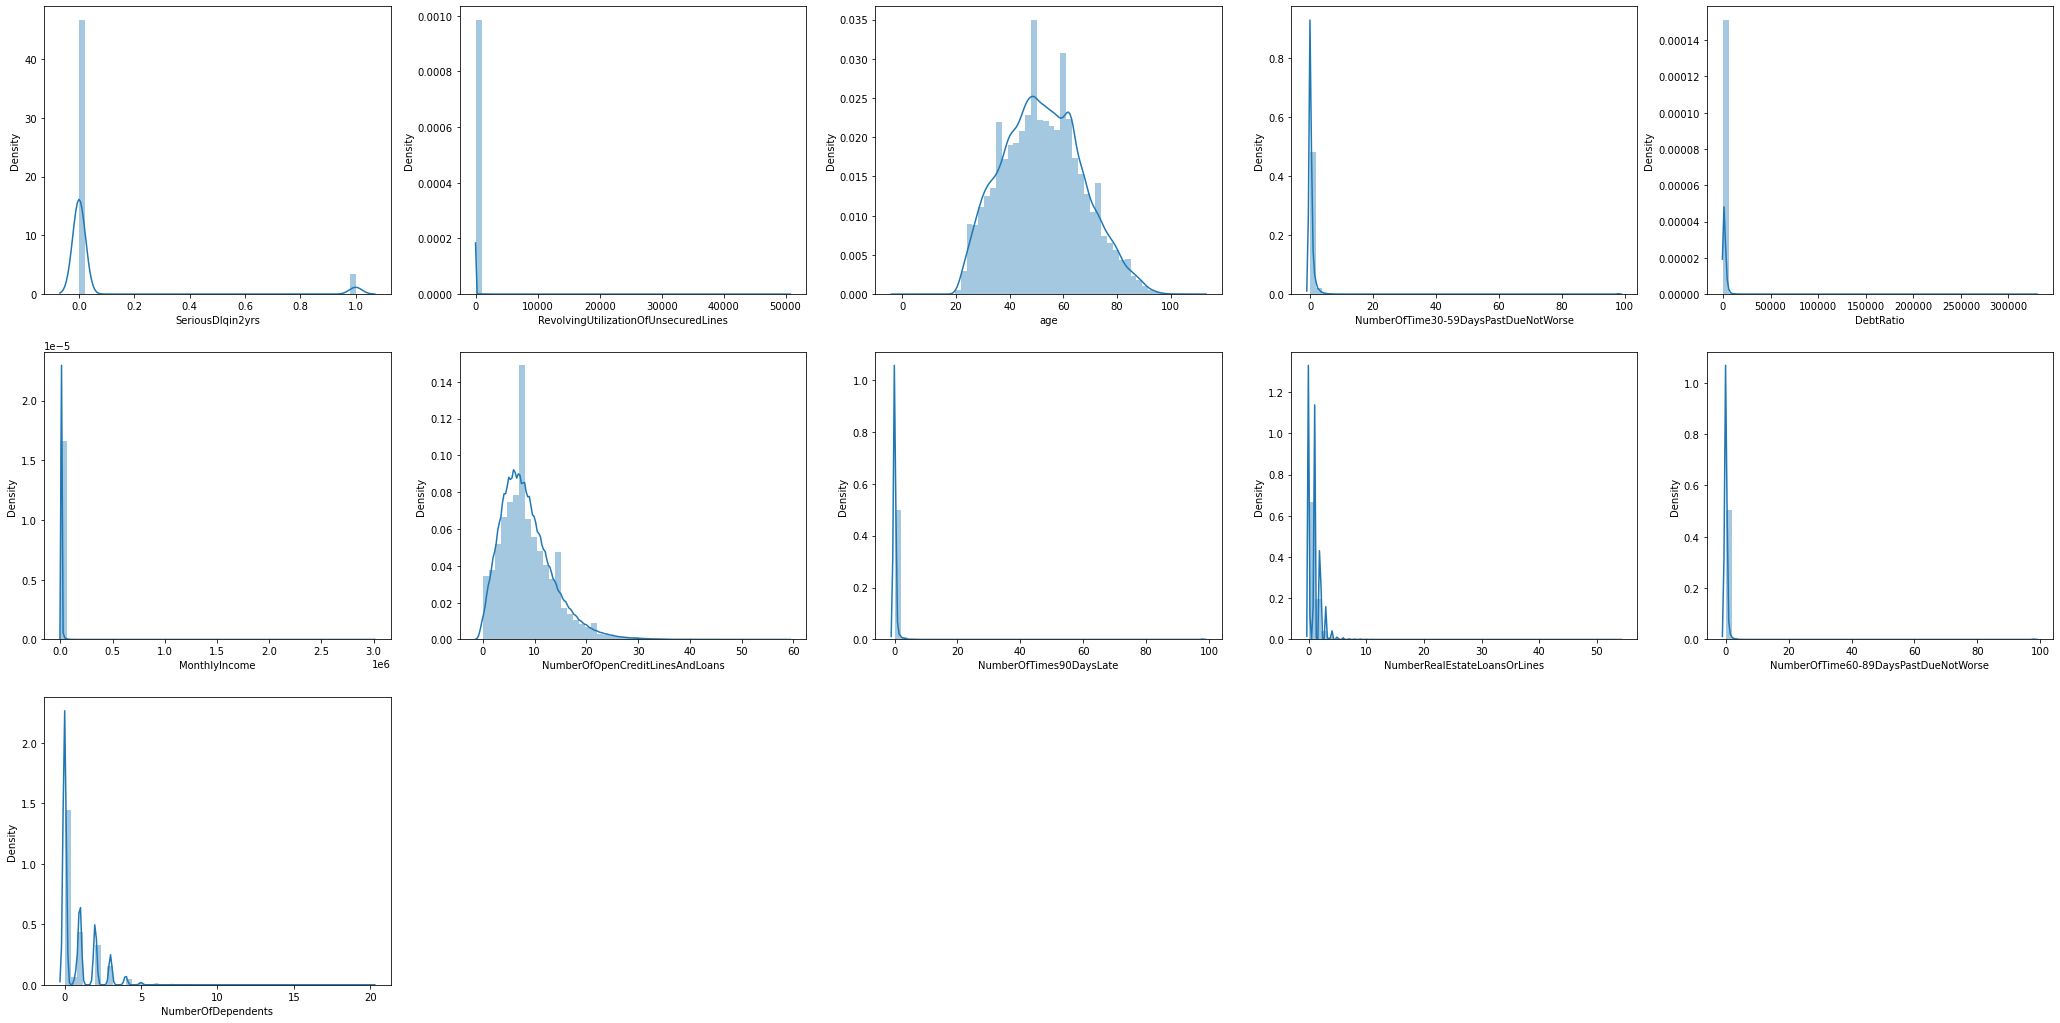

In [23]:
# Density vs Data Features
cont = df.select_dtypes(exclude='object').columns
nrow = (len(cont)+5-1)/5
plt.figure(figsize=(12*3,6*3))
for i,j in enumerate(cont):
    plt.subplot(nrow,5,i+1)
    sns.distplot(df[j])
plt.savefig('./Density.png')
plt.show()

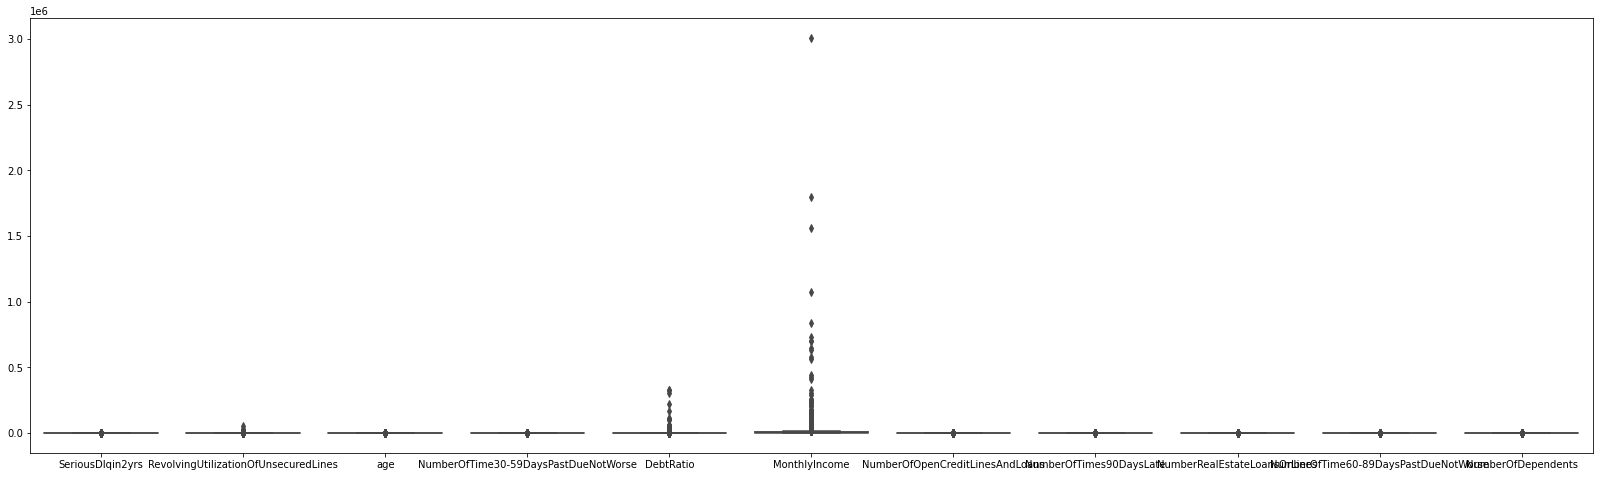

In [24]:
plt.figure(figsize = (28,8))
sns.boxplot(data=df)
plt.savefig('./BoxPlot.png')

* The ends of whiskers are the maximum and minimum range of data distribution.
* The central line in the box is the median of the entire data distribution.
* The right and left edges in the box are the medians of data distribution to the right and left from the central median, respectively.



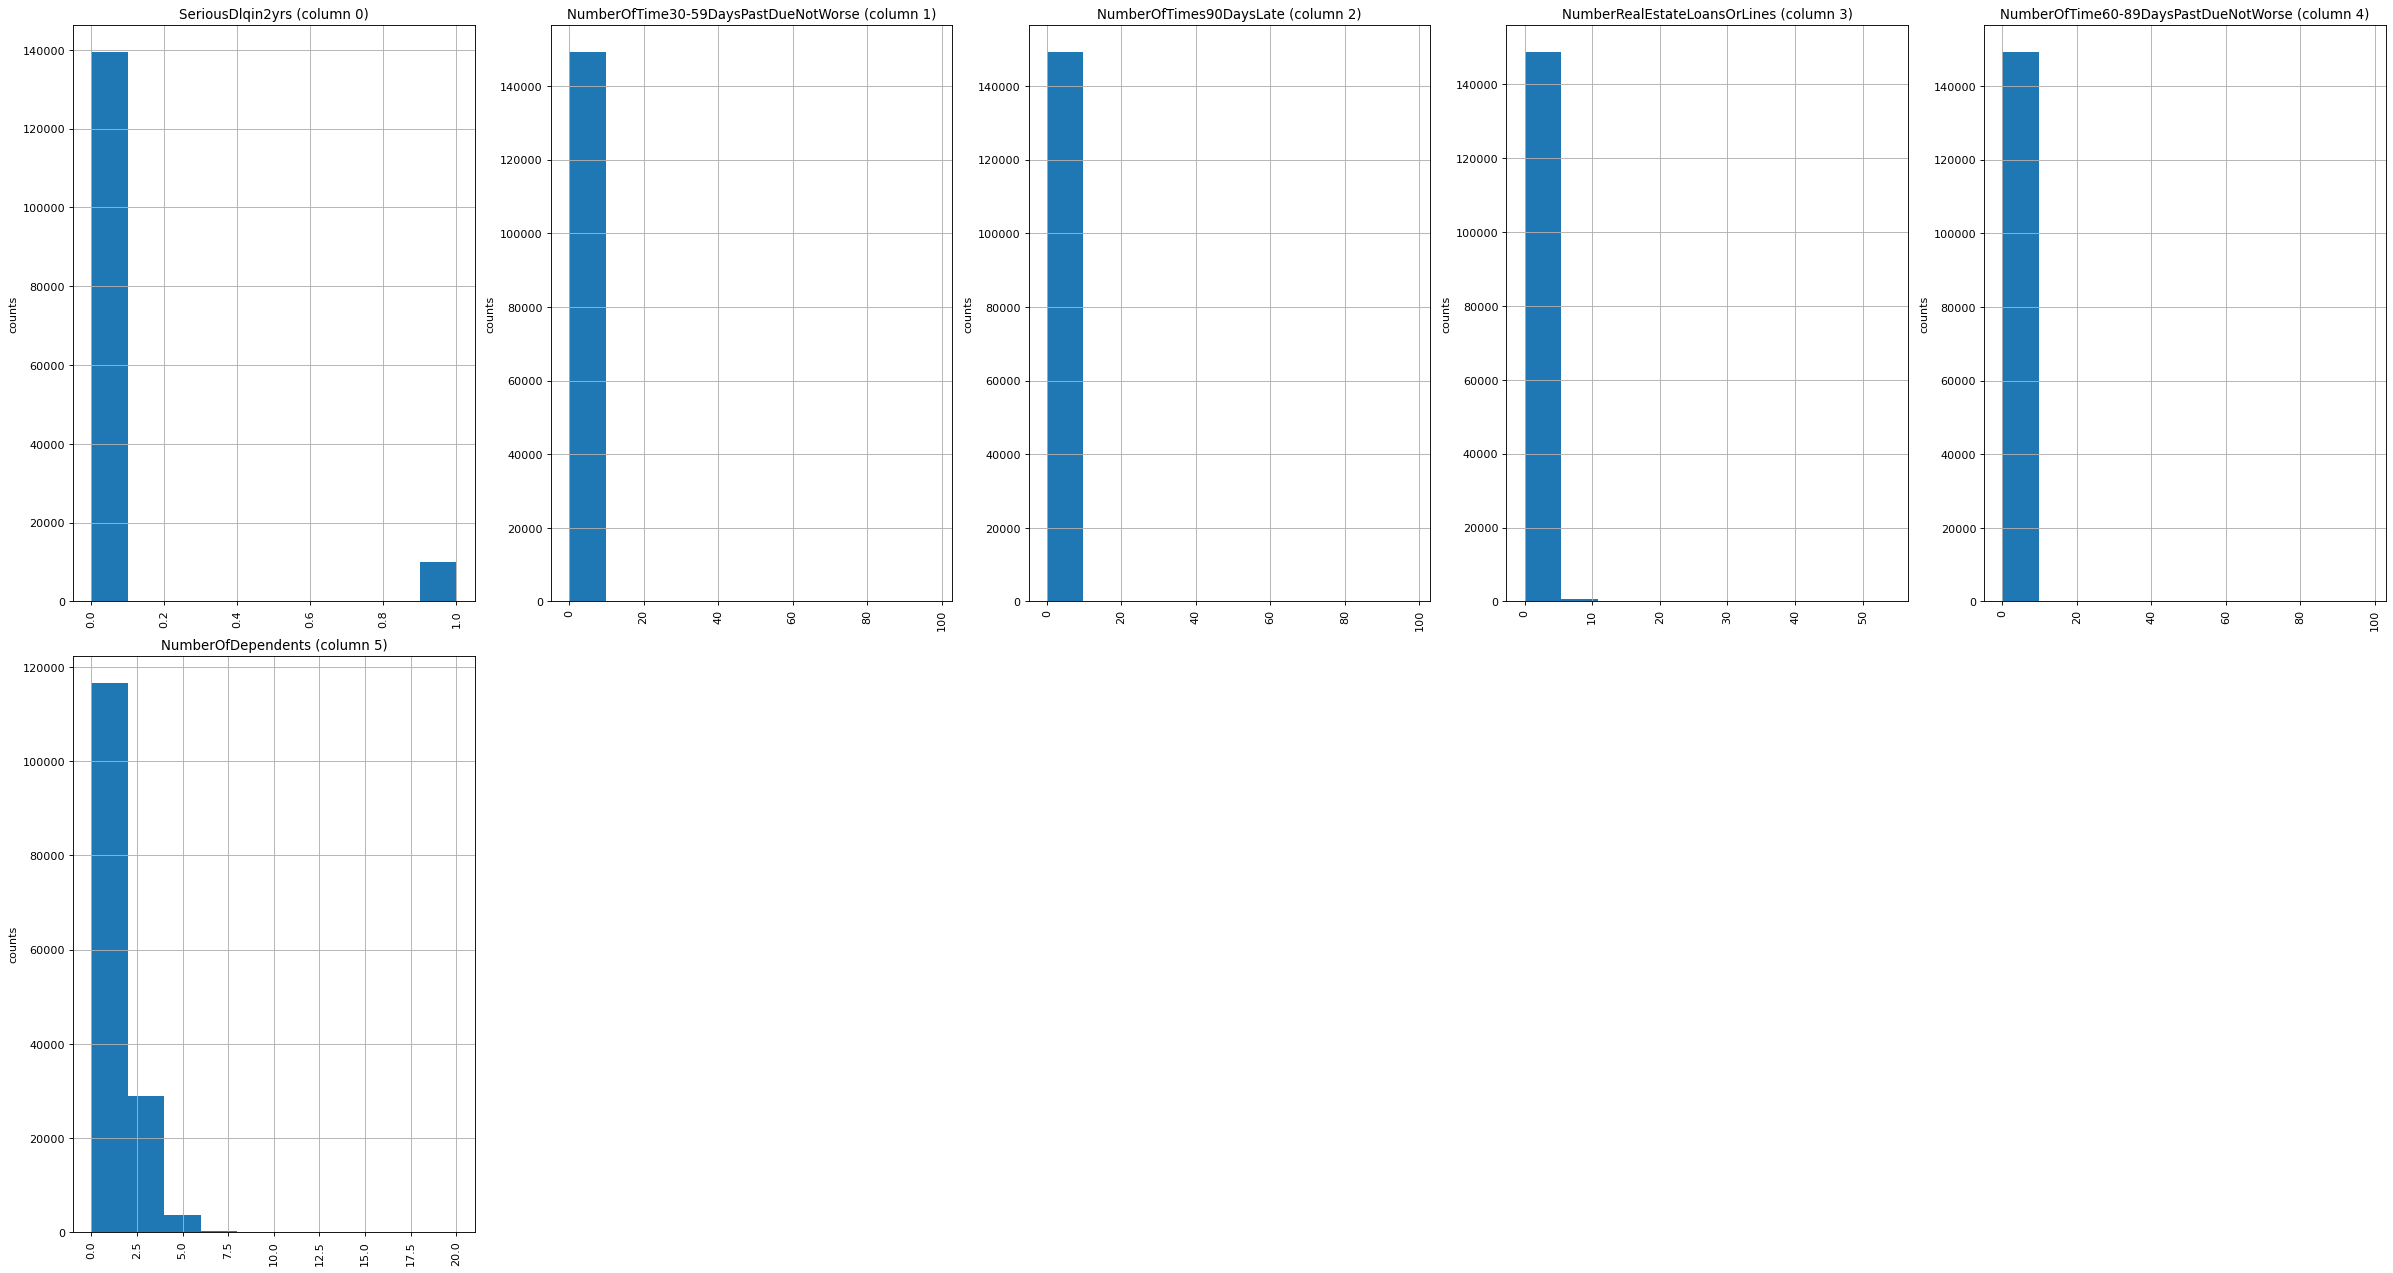

In [25]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig('./DistributionGraph.png')
    plt.show()

plotPerColumnDistribution(df, 10, 5)

### Data Interpretation

#### Data Dictionary: 

In [26]:
pd.read_csv("Data Dictionary.csv")

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


* Raw Data Contains rows: 251503  columns: 12
* There are 2,51,503 distinct customerms whose credit details are available.
* The average Debt Ratio of customers is 0.3 
* Average age is 52.3 years, with a standard deviation of 14.7.
* There are 81 distinct values for amount of credit limit.
* Average Number Of Dependents is 0.7


## Generating clean CSV

In [27]:
df.to_csv('Cleaned_data.csv')
#Generating csv from cleaned data frame 


df.shape
#Shape of cleaned data frame

(149391, 11)

# Phase 2


### Problem definition

A credit risk analysis on potential borrowers is done in order to estimate their ability to pay debt obligations. The fundamental purpose of credit analysis is to establish a potential borrower's creditworthiness and capacity to meet their debt obligations.

### Dataset
- The training dataset used is from kaggle which is being used to train the models used in this project.
https://www.kaggle.com/abbasheera/hack-cred-card-prediction/data
- A brief summary of the data set is depicted in the data dictionary given below.

In [28]:
pd.read_csv("Data Dictionary.csv")

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


### Packages used:

#### Numpy
- NumPy is a well-known array-processing library for Python. NumPy is capable of processing massive multidimensional arrays and matrices thanks to its large set of high-complexity mathematical functions. 
- For linear algebra, Fourier transforms, and random numbers, NumPy is quite useful.

#### Scikit-learn
- Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
- It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. 

#### Pandas
- Pandas is an open-sourced Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

#### Matplotlib
- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

#### Seaborn
- Seaborn is a Python package for creating statistical graphs. It's developed on top of Matplotlib and includes support for pandas data structures.

#### Scikit-plot
- Scikit-plot is the python package that can help you visualize your data, model(during training), and experiment results at different stages of your machine learning project.


#### Defining X / Y training / test sets

In [29]:
y = df.iloc[:,0].values #Taking first col (credit worthiness value)
X = df.iloc[:, 1:11].values #Taking the rest of the cols

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) #Splitting 20% of data for test

#### Standardization of data

In [31]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
lab_enc = preprocessing.LabelEncoder()

#Avoiding continous label type error
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

#### Model building - Logistic Regression (Scikit)

In [34]:
lrClassifier = LogisticRegression()
lrClassifier.fit(X_train, y_train)
y_pred_LR = lrClassifier.predict(X_test)

#### Analyzing results of Logistic Regression model

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix


In [36]:
cmlr = confusion_matrix(y_test,y_pred_LR)
roclr =roc_auc_score(y_test, y_pred_LR)
acclr = accuracy_score(y_test,y_pred_LR)
preclr = precision_score(y_test, y_pred_LR)
reclr = recall_score(y_test, y_pred_LR)
f1lr = f1_score(y_test, y_pred_LR)
resultslr = pd.DataFrame([['Logistic Regression', acclr,preclr,reclr, f1lr,roclr]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultslr

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.934134,0.625954,0.04098,0.076923,0.519611


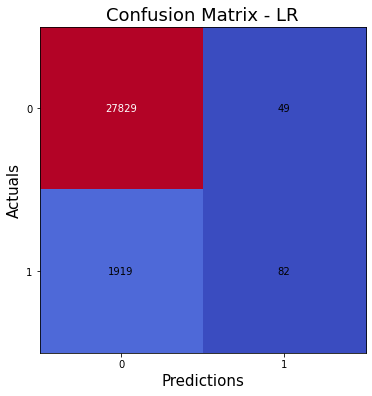

In [37]:
fig, ax = plot_confusion_matrix(conf_mat=cmlr, figsize=(6, 6), cmap="coolwarm")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - LR', fontsize=18)
plt.show()

#### Model building - Random Forest

In [38]:
rfMod = RandomForestClassifier(n_estimators=100)
rfMod.fit(X_train, y_train)
y_pred_RF = rfMod.predict(X_test)

#### Analyzing results of RandomForest model

In [39]:
cmRf = confusion_matrix(y_test,y_pred_RF)
rocRf = roc_auc_score(y_test, y_pred_RF)
accRf = accuracy_score(y_test,y_pred_RF)
precRf = precision_score(y_test, y_pred_RF)
recRf = recall_score(y_test, y_pred_RF)
f1Rf = f1_score(y_test, y_pred_RF)
resultsRf = pd.DataFrame([['Random Forest', accRf,precRf,recRf, f1Rf,rocRf]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsRf

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest,0.93554,0.555066,0.188906,0.281879,0.589018


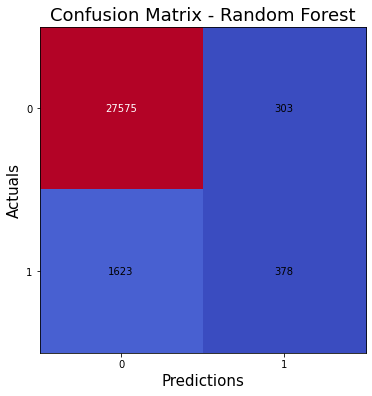

In [40]:
fig, ax = plot_confusion_matrix(conf_mat=cmRf, figsize=(6, 6), cmap="coolwarm")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - Random Forest', fontsize=18)
plt.show()

#### Model building - KNN

In [41]:
knMod = KNeighborsClassifier(n_neighbors=5)
knMod.fit(X_train, y_train)
y_pred_KNN = knMod.predict(X_test)

#### Analyzing results of KNN model

In [42]:
cmKNN = confusion_matrix(y_test,y_pred_KNN)
rocKNN =roc_auc_score(y_test, y_pred_KNN)
accKNN = accuracy_score(y_test,y_pred_KNN)
precKNN = precision_score(y_test, y_pred_KNN)
recKNN = recall_score(y_test, y_pred_KNN)
f1KNN = f1_score(y_test, y_pred_KNN)
resultsKNN = pd.DataFrame([['KNN', accKNN,precKNN,recKNN, f1KNN,rocKNN]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsKNN

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,KNN,0.932729,0.491773,0.134433,0.211146,0.56223


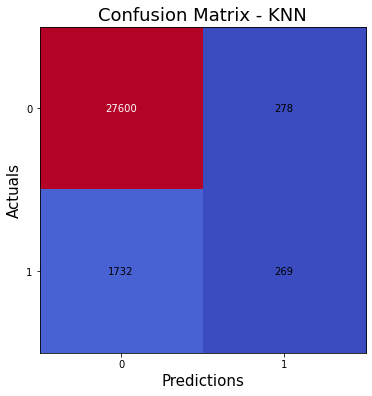

In [43]:
fig, ax = plot_confusion_matrix(conf_mat=cmKNN, figsize=(6, 6), cmap="coolwarm")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - KNN', fontsize=18)
plt.show()

### Logistic Regression (Scratch implementation)

In [44]:
# Logistic regression User Defined
class logistic_regression:
    def __init__(self,x,y): 
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
 
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
 
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
 
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x , sigma, self.y)
            #Updating the weights
            self.weight -= lr * dW
        return print('Fit complete')
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i].any() == True:
                y_pred[i] = 1
            else:
                continue
 
        return y_pred

In [45]:
yM = y[:20000]
XM = X[:20000]
#Taking the first 20,000 values to train the model faster 

In [46]:
regressor = logistic_regression(XM,yM)
regressor.fit(0.1 , 5000)
pred_lr = regressor.predict(XM,0.5)

Fit complete


In [47]:
yMarr = np.asarray(yM)
print("Accuracy Score: \n"+str(accuracy_score(yMarr,pred_lr)))


Accuracy Score: 
0.93485


In [48]:
cmLR_manual = confusion_matrix(yMarr,pred_lr)
rocLR_manual =roc_auc_score(yMarr, pred_lr)
accLR_manual = accuracy_score(yMarr, pred_lr)
precLR_manual = precision_score(yMarr, pred_lr)
recLR_manual = recall_score(yMarr, pred_lr)
f1LR_manual = f1_score(yMarr, pred_lr)
resultsLR_manual = pd.DataFrame([['Logistic Regression (Manual)', accLR_manual,precLR_manual,recLR_manual, f1LR_manual,rocLR_manual]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
resultsLR_manual

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression (Manual),0.93485,0.055556,0.000777,0.001533,0.499934


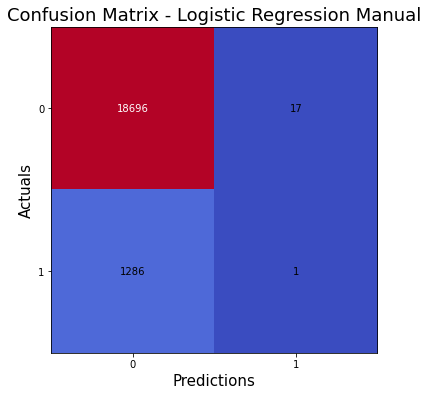

In [49]:
fig, ax = plot_confusion_matrix(conf_mat=cmLR_manual, figsize=(6, 6), cmap="coolwarm")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - Logistic Regression Manual', fontsize=18)
plt.show()

###  K-Fold Cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, model_selection

In [51]:
skf = StratifiedKFold(n_splits=10, random_state=None)
for train_index, test_index in skf.split(X,y):
 X_train_skf, X_test_skf = X[train_index], X[test_index]
 y_train_skf, y_test_skf = y[train_index], y[test_index]

In [52]:
#Logistic Regression

logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train_skf,y_train_skf)
y_pred_lr_skf = logmodel.predict(X_test_skf)
roc=roc_auc_score(y_test_skf, y_pred_lr_skf)
acc = accuracy_score(y_test_skf, y_pred_lr_skf)
prec = precision_score(y_test_skf, y_pred_lr_skf)
rec = recall_score(y_test_skf, y_pred_lr_skf)
f1 = f1_score(y_test_skf, y_pred_lr_skf)
skf_results = pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

In [53]:
#KNN

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_skf,y_train_skf)
y_pred_knn_skf = knn.predict(X_test_skf)
roc=roc_auc_score(y_test_skf, y_pred_knn_skf)
acc = accuracy_score(y_test_skf, y_pred_knn_skf)
prec = precision_score(y_test_skf, y_pred_knn_skf)
rec = recall_score(y_test_skf, y_pred_knn_skf)
f1 = f1_score(y_test_skf, y_pred_knn_skf)
skf_model = pd.DataFrame([['K-Nearest Neighbour Tuned', acc,prec,rec, f1,roc]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

In [54]:
#Random Forest

rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train_skf,y_train_skf)
y_pred_rfc_skf = rfc.predict(X_test_skf)
roc=roc_auc_score(y_test_skf, y_pred_rfc_skf)
acc = accuracy_score(y_test_skf, y_pred_rfc_skf)
prec = precision_score(y_test_skf, y_pred_rfc_skf)
rec = recall_score(y_test_skf, y_pred_rfc_skf)
f1 = f1_score(y_test_skf, y_pred_rfc_skf)
skf_model = pd.DataFrame([['Random Forest Classifier Tuned', acc,prec,rec, f1,roc]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

In [55]:
skf_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression Tuned,0.933530,0.684211,0.013,0.025515,0.506285
1,K-Nearest Neighbour Tuned,0.933396,0.777778,0.007,0.013875,0.503428
2,Random Forest Classifier Tuned,0.937546,0.603077,0.196,0.295849,0.593373


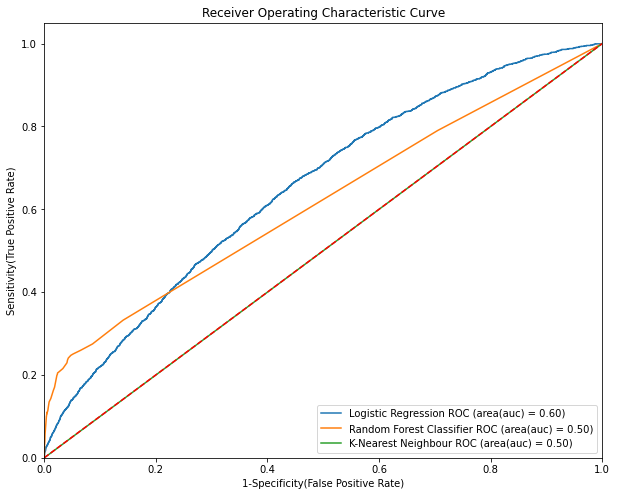

In [56]:
y_pred_log_p =logmodel.predict_proba(X_test)[:,1]
y_pred_rfc_p =rfc.predict_proba(X_test)[:,1]
y_pred_knn_p =knn.predict_proba(X_test)[:,1]

model = [logmodel,rfc,knn]
models = [y_pred_log_p,y_pred_rfc_p,y_pred_knn_p]
label = ['Logistic Regression','Random Forest Classifier','K-Nearest Neighbour']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)

for m in m:
 fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
 auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
 plt.plot(fpr, tpr, label='%s ROC (area(auc) = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

#### Algorithms comparison

In [57]:
#Combining results
frames = [resultslr ,resultsKNN , resultsRf , resultsLR_manual] 
results = pd.concat(frames)

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.934134,0.625954,0.040980,0.076923,0.519611
0,KNN,0.932729,0.491773,0.134433,0.211146,0.562230
0,Random Forest,0.935540,0.555066,0.188906,0.281879,0.589018
0,Logistic Regression (Manual),0.934850,0.055556,0.000777,0.001533,0.499934


LR: 0.933209 (0.002552)
KNN: 0.933229 (0.002529)
RFC: 0.935451 (0.002296)


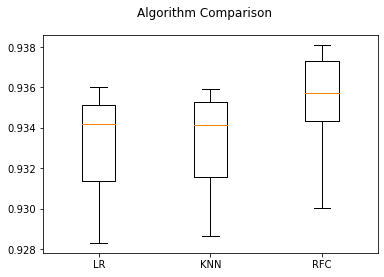

In [58]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', knn))
models.append(('RFC', rfMod))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
